In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [228]:
dict = joblib.load('data/demo_walk_1.pkl')

In [229]:
frames = list(dict.keys())
print(frames[0])

outputs//_DEMO/walk_1/img/000001.jpg


In [230]:
params = list(dict.get(frames[0]).keys())

In [231]:
joints_2d = dict.get(frames[0]).get('2d_joints')

In [232]:
def get_2d_joints(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('2d_joints'))
    
    #reshape to (frames, 90)
    joints_2d = np.array(joints_2d)
    joints_2d = joints_2d.reshape(joints_2d.shape[0], -1)
    
    return np.array(joints_2d)

def get_smpl(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('smpl')[0])
    
    # #reshape to (frames, 90)
    # joints_2d = np.array(joints_2d)
    # joints_2d = joints_2d.reshape(joints_2d.shape[0], -1)
    
    return np.array(joints_2d)

In [238]:
from scipy.spatial import transform


In [257]:
smpl_frames = np.array([get_smpl(dict)[i]['body_pose'][7] for i in range(len(get_smpl(dict)))])

joints = [smpl_frames[i] for i in range(len(smpl_frames))]

# smpl = get_smpl(dict)[0]['body_pose']
# smpl[7]
# print(joints)

joints_x = []
joints_y = []
joints_z = []

for i in range(402):
    r = transform.Rotation.from_matrix(joints[i])
    r = r.as_euler('xyz', degrees=False)
    
    joints_x.append(r[0])
    joints_y.append(r[1])
    joints_z.append(r[2])
    
# plt.plot(joints)
# plt.show()

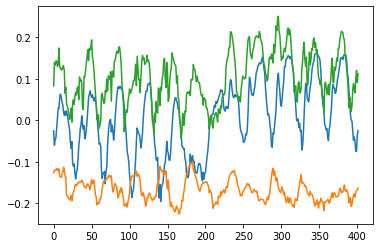

In [260]:
plt.plot(joints_x)
plt.plot(joints_y)
plt.plot(joints_z)

In [234]:
np.array(joints_2d).shape

(1, 90)

In [235]:
joints = get_2d_joints(dict)


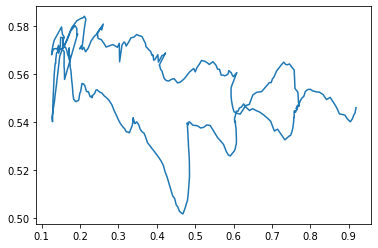

In [236]:
#plot the i'th joint
i = 8
i = i - (i%2)
plt.plot(joints[:,i], joints[:,i+1])
plt.show()